# Project 1: Predicting the Sale Price of Bulldozers

# Get workspace ready

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# 1.Data pre-processing

In [ ]:
df = pd.read_csv("/content/TrainAndValid.csv", low_memory=False)

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121.0,3.0,2004.0,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121.0,3.0,1996.0,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121.0,3.0,2001.0,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121.0,3.0,2001.0,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121.0,3.0,2007.0,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
57870,1315709,10500,55909,4323,132.0,10.0,1993.0,NaN,NaN,3/17/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
57871,1315713,33000,1251347,4323,132.0,1.0,1994.0,NaN,NaN,5/20/1997 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
57872,1315714,24000,1242883,4323,132.0,10.0,1993.0,NaN,NaN,4/7/1999 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
57873,1315715,39000,962647,4323,132.0,1.0,1995.0,NaN,NaN,9/22/1998 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
57874,1315721,24750,27172,432,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df.dtypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57875 entries, 0 to 57874
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   57875 non-null  int64  
 1   SalePrice                 57875 non-null  int64  
 2   MachineID                 57875 non-null  int64  
 3   ModelID                   57875 non-null  int64  
 4   datasource                57874 non-null  float64
 5   auctioneerID              57874 non-null  float64
 6   YearMade                  57874 non-null  float64
 7   MachineHoursCurrentMeter  25472 non-null  float64
 8   UsageBand                 22546 non-null  object 
 9   saledate                  57874 non-null  object 
 10  fiModelDesc               57874 non-null  object 
 11  fiBaseModel               57874 non-null  object 
 12  fiSecondaryDesc           41207 non-null  object 
 13  fiModelSeries             4309 non-null   object 
 14  fiMode

In [ ]:
df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,1
auctioneerID,1
YearMade,1
MachineHoursCurrentMeter,32403
UsageBand,35329
saledate,1


In [ ]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

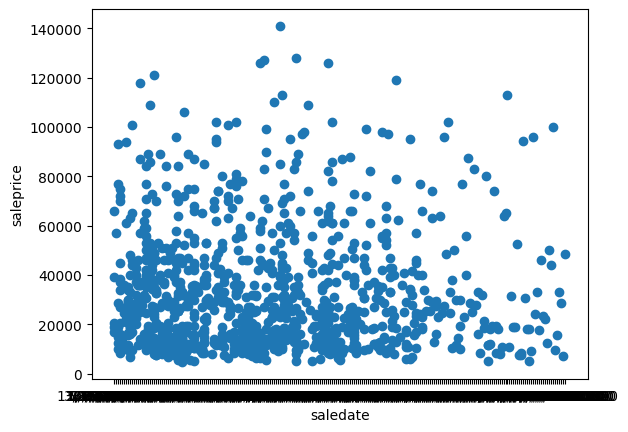

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
ax.set_xlabel("saledate")
ax.set_ylabel("saleprice")
plt.show()

In [ ]:
df.saledate[:1000]

,saledate
0,11/16/2006 0:00
1,3/26/2004 0:00
2,2/26/2004 0:00
3,5/19/2011 0:00
4,7/23/2009 0:00
...,...
995,7/16/2009 0:00
996,6/14/2007 0:00
997,9/22/2005 0:00
998,7/28/2005 0:00


<Axes: ylabel='Frequency'>

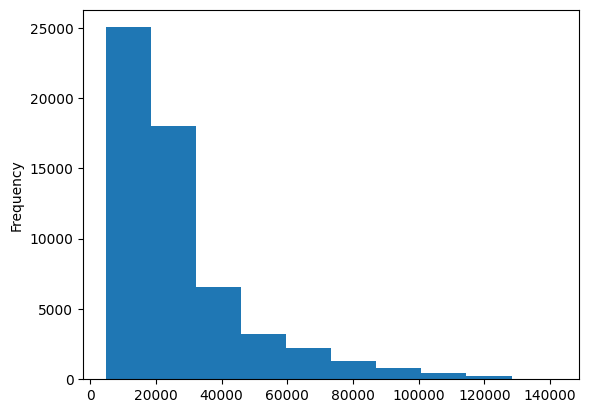

In [ ]:
df.SalePrice.plot.hist()

## Parsing dates

In [ ]:
df = pd.read_csv("TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [ ]:
df["saledate"]

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
...,...
68871,2000-09-26
68872,2007-11-27
68873,2001-03-15
68874,1993-10-04


In [ ]:
df.saledate[:1000]

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
...,...
995,2009-07-16
996,2007-06-14
997,2005-09-22
998,2005-07-28


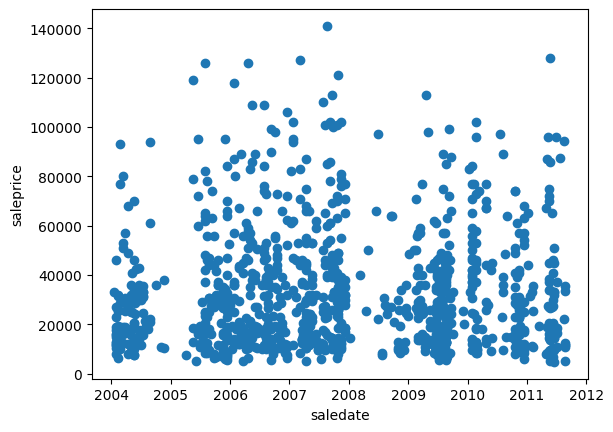

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
ax.set_xlabel("saledate")
ax.set_ylabel("saleprice")
plt.show()

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157.0,121.0,3.0,2004.0,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77.0,121.0,3.0,1996.0,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009.0,121.0,3.0,2001.0,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332.0,121.0,3.0,2001.0,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311.0,121.0,3.0,2007.0,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157.0,77.0,7009.0,332.0,17311.0
datasource,121.0,121.0,121.0,121.0,121.0
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004.0,1996.0,2001.0,2001.0,2007.0
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
df.saledate.head(10)

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
5,2008-12-18
6,2004-08-26
7,2005-11-17
8,2009-08-27
9,2007-08-09


## Sort DataFrame by saledate

In [ ]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

,saledate
32138,1989-01-31
63167,1989-01-31
32317,1989-01-31
54181,1989-01-31
66337,1989-01-31
63166,1989-01-31
28820,1989-01-31
28757,1989-01-31
63155,1989-01-31
54653,1989-01-31


## Make a copy of the original DataFrame

In [ ]:
df["saledate"]

,saledate
32138,1989-01-31
63167,1989-01-31
32317,1989-01-31
54181,1989-01-31
66337,1989-01-31
...,...
23970,2011-12-29
23968,2011-12-29
23972,2011-12-29
23967,2011-12-29


In [ ]:
df_tmp = df.copy()

In [ ]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
df_tmp["saledate"]

,saledate
32138,1989-01-31
63167,1989-01-31
32317,1989-01-31
54181,1989-01-31
66337,1989-01-31
...,...
23970,2011-12-29
23968,2011-12-29
23972,2011-12-29
23967,2011-12-29


## Add datetime parameters for saledate column

In [ ]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [ ]:
df_tmp["saleYear"]

,saleYear
32138,1989.0
63167,1989.0
32317,1989.0
54181,1989.0
66337,1989.0
...,...
23970,2011.0
23968,2011.0
23972,2011.0
23967,2011.0


In [ ]:
df_tmp.drop("saledate", axis=1, inplace=True)

In [ ]:
df_tmp.state.value_counts()

,count
state,
Texas,8899
Florida,8805
California,4550
Georgia,2706
Ohio,2304
Washington,2160
Pennsylvania,2140
Illinois,2062
North Carolina,1984


In [ ]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
32138,1264985,20000,1204499,6788.0,132.0,99.0,1984.0,NaN,NaN,580,...,NaN,NaN,NaN,NaN,NaN,1989.0,1.0,31.0,1.0,31.0
63167,1329620,26500,1253848,4089.0,132.0,99.0,1987.0,NaN,NaN,D3B,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989.0,1.0,31.0,1.0,31.0
32317,1265202,21000,1385055,6788.0,132.0,99.0,1984.0,NaN,NaN,580,...,NaN,NaN,NaN,NaN,NaN,1989.0,1.0,31.0,1.0,31.0
54181,1301225,21000,1246885,4123.0,132.0,18.0,1972.0,NaN,NaN,D6C,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989.0,1.0,31.0,1.0,31.0
66337,1338469,50000,1505032,23944.0,132.0,99.0,1984.0,NaN,NaN,215B,...,NaN,NaN,NaN,NaN,NaN,1989.0,1.0,31.0,1.0,31.0


In [ ]:
len(df_tmp)

68876

# 2.Building a model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68876 entries, 32138 to 68875
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   68876 non-null  int64  
 1   SalePrice                 68876 non-null  int64  
 2   MachineID                 68876 non-null  int64  
 3   ModelID                   68875 non-null  float64
 4   datasource                68875 non-null  float64
 5   auctioneerID              68875 non-null  float64
 6   YearMade                  68875 non-null  float64
 7   MachineHoursCurrentMeter  25660 non-null  float64
 8   UsageBand                 22734 non-null  object 
 9   fiModelDesc               68875 non-null  object 
 10  fiBaseModel               68875 non-null  object 
 11  fiSecondaryDesc           50193 non-null  object 
 12  fiModelSeries             4614 non-null   object 
 13  fiModelDescriptor         10981 non-null  object 
 14  Product

In [ ]:
df_tmp["UsageBand"].dtype

dtype('O')

In [ ]:
df_tmp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,1
datasource,1
auctioneerID,1
YearMade,1
MachineHoursCurrentMeter,43216
UsageBand,46142
fiModelDesc,1


## Convert string to categories

In [ ]:
df_tmp.head().T

,32138,63167,32317,54181,66337
SalesID,1264985,1329620,1265202,1301225,1338469
SalePrice,20000,26500,21000,21000,50000
MachineID,1204499,1253848,1385055,1246885,1505032
ModelID,6788.0,4089.0,6788.0,4123.0,23944.0
datasource,132.0,132.0,132.0,132.0,132.0
auctioneerID,99.0,99.0,99.0,18.0,99.0
YearMade,1984.0,1987.0,1984.0,1972.0,1984.0
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,580,D3B,580,D6C,215B


In [ ]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [ ]:
pd.api.types.is_string_dtype(df_tmp["state"])

False

In [ ]:
pd.api.types.is_object_dtype(df_tmp["Steering_Controls"])

True

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_tmp.info()

In [ ]:
df_tmp.state.cat.categories

In [ ]:
df_tmp.state.value_counts()

In [ ]:
df_tmp.state.cat.codes

In [ ]:
df_tmp.isnull().sum()/len(df_tmp)

In [ ]:
df_tmp["saleYear"]

## Save preprocessed data

In [ ]:
df_tmp.to_csv("train_tmp.csv", index=False)

In [ ]:
df_tmp = pd.read_csv("train_tmp.csv", low_memory=False)
df_tmp.head().T

In [ ]:
df_tmp.isna().sum()

In [ ]:
df_tmp["saleYear"]

## Fill missing values

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

In [ ]:
df_tmp.ModelID

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())

In [ ]:
df_tmp.auctioneerID

In [ ]:
df_tmp.auctioneerID.isna().sum()

In [ ]:
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
df_tmp.isna().sum()

In [ ]:
df_tmp["saleYear"]

## Filling and turning categorical variables into numbers

In [ ]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [ ]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        df_tmp[label] = pd.Categorical(content).codes+1

In [ ]:
pd.Categorical(df_tmp["state"]).dtype

In [ ]:
pd.Categorical(df_tmp["state"]).codes+1

In [ ]:
pd.Categorical(df_tmp["UsageBand"]).codes+1

In [ ]:
df_tmp.info()

In [ ]:
df_tmp.head().T

In [ ]:
df_tmp.isna().sum()

In [ ]:
df_tmp.isna().sum()[:10]

In [ ]:
df_tmp.head()

In [ ]:
len(df_tmp)

# 3.Training a model

In [ ]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

In [ ]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

## Splitting data into train and validation sets

In [ ]:
df_tmp1 = pd.read_csv("Valid.csv", low_memory=False, parse_dates=["saledate"])
df_tmp1

In [ ]:
df_tmp1.info()

In [ ]:
df_tmp1.isna().sum()

In [ ]:
df_tmp1.sort_values(by=["saledate"], inplace=True, ascending=True)
df_tmp1.saledate.head(20)

In [ ]:
df_tmp2 = df_tmp1.copy()

In [ ]:
df_tmp2.columns

In [ ]:
df_tmp2["saleYear"] = df_tmp2.saledate.dt.year
df_tmp2["saleMonth"] = df_tmp2.saledate.dt.month
df_tmp2["saleDay"] = df_tmp2.saledate.dt.day
df_tmp2["saleDayOfWeek"] = df_tmp2.saledate.dt.dayofweek
df_tmp2["saleDayOfYear"] = df_tmp2.saledate.dt.dayofyear

In [ ]:
df_tmp2.drop("saledate", axis=1, inplace=True)

In [ ]:
df_tmp2.info()

In [ ]:
df_tmp2.isna().sum()

In [ ]:
for label, content in df_tmp2.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [ ]:
for label, content in df_tmp2.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

In [ ]:
for label, content in df_tmp2.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp2[label] = content.astype("category").cat.as_ordered()

In [ ]:
for label, content in df_tmp2.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp2[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_tmp2.info()

In [ ]:
df_tmp2.isnull().sum()

In [ ]:
for label, content in df_tmp2.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

In [ ]:
for label, content in df_tmp2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
for label, content in df_tmp2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp2[label+"_is_missing"] = pd.isnull(content)
            df_tmp2[label] = content.fillna(content.median())

In [ ]:
for label, content in df_tmp2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
df_tmp2.isna().sum()

In [ ]:
for label, content in df_tmp2.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [ ]:
for label, content in df_tmp2.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp2[label+"_is_missing"] = pd.isnull(content)
        df_tmp2[label] = pd.Categorical(content).codes+1

In [ ]:
df_tmp2.info()

In [ ]:
df_tmp2.isna().sum()

In [ ]:
df_tmp2["saleYear"]

In [ ]:
df_tmp["saleYear"]

In [ ]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]
len(df_val), len(df_train)

In [ ]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

In [ ]:
X_train

In [ ]:
y_train

# 4.Evaluating a model

## Building an evaluation function

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

# 5.Tuning hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions=rf_grid, n_iter=2, cv=5, verbose=True)

rs_model.fit(X_train, y_train)

In [ ]:
rs_model.best_params_

In [ ]:
show_scores(rs_model)

## Train a model with best hyperparameters

In [ ]:
X_train.info()

In [ ]:
y_train.info()

In [ ]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

ideal_model.fit(X_train, y_train)

In [ ]:
show_scores(ideal_model)

In [ ]:
show_scores(rs_model)

In [ ]:
X_train

In [ ]:
X_train.columns

In [ ]:
X_train.columns.tolist()

In [ ]:
X_train.auctioneerID

In [ ]:
X_train.auctioneerID.isna().sum()

In [ ]:
X_train.auctioneerID_is_missing

In [ ]:
X_train.auctioneerID_is_missing.isna().sum()

In [ ]:
y_train

# 6.Deployment

## Make predictions on test data

In [ ]:
df_test = pd.read_csv("Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

In [ ]:
len(df_test)

In [ ]:
df_test.columns

In [ ]:
df_test.info()

In [ ]:
df_test["saleYear"] = df_test.saledate.dt.year
df_test["saleMonth"] = df_test.saledate.dt.month
df_test["saleDay"] = df_test.saledate.dt.day
df_test["saleDayOfWeek"] = df_test.saledate.dt.dayofweek
df_test["saleDayOfYear"] = df_test.saledate.dt.dayofyear

In [ ]:
df_test.saleYear

In [ ]:
df_test.saleYear.value_counts()

In [ ]:
df_test.drop("saledate", axis=1, inplace=True)

In [ ]:
df_test.head()

In [ ]:
df_test.isna().sum()

In [ ]:
df_test.columns

In [ ]:
df_test.head().T

In [ ]:
pd.api.types.is_object_dtype(df_test["Backhoe_Mounting"])

In [ ]:
for label, content in df_test.items():
    if pd.api.types.is_object_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_test.info()

In [ ]:
df_test.isnull().sum()/len(df_test)

In [ ]:
df_test.isna().sum()

In [ ]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

In [ ]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label+"_is_missing"] = pd.isnull(content)
            df_test[label] = content.fillna(content.median())

In [ ]:
df_test.MachineHoursCurrentMeter

In [ ]:
df_test.MachineHoursCurrentMeter.isna().sum()

In [ ]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
df_test.MachineHoursCurrentMeter_is_missing.value_counts()

In [ ]:
df_test.isna().sum()

In [ ]:
df_test.info()

In [ ]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [ ]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label+"_is_missing"] = pd.isnull(content)
        df_test[label] = pd.Categorical(content).codes+1

In [ ]:
df_test.info()

In [ ]:
df_test.columns

In [ ]:
df_test.columns

In [ ]:
df_test.info()

In [ ]:
df_test.saleYear

In [ ]:
df_test.saleYear.value_counts()

In [ ]:
df_test.info()

In [ ]:
X_train.auctioneerID_is_missing

In [ ]:
df_test = df_test.assign(auctioneerID_is_missing = [False]*12457)

In [ ]:
X_test = df_test
X_test.shape

In [ ]:
X_train.columns.tolist()

In [ ]:
X_test.columns.tolist()

In [ ]:
X_train.columns.tolist() == X_test.columns.tolist()

In [ ]:
X_train_columns = X_train.columns
X_test = X_test[X_train_columns]

In [ ]:
test_preds = ideal_model.predict(X_test)
test_preds

In [ ]:
len(test_preds)

## preprocessing data for test dataset

In [ ]:
df_test = pd.read_csv("Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

In [ ]:
df_test.info()

In [ ]:
def preprocess_data(df):

    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)

    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    return df

In [ ]:
df_test = preprocess_data(df_test)
df_test.head()

In [ ]:
df_test.info()

In [ ]:
X_train.info()

In [ ]:
test_preds = ideal_model.predict(X_test)
test_preds

In [ ]:
X_train.head()

In [ ]:
set(X_train.columns) - set(df_test.columns)

In [ ]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

In [ ]:
df_test.info()

In [ ]:
test_preds = ideal_model.predict(X_test)

In [ ]:
test_preds

In [ ]:
len(test_preds)

In [ ]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

In [ ]:
df_preds.to_csv("test_predictions.csv", index=False)

## Feature Importance

In [ ]:
ideal_model.feature_importances_

In [ ]:
len(ideal_model.feature_importances_)

In [ ]:
X_train.shape

In [ ]:
X_train.columns

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, "feature_importances": importances}).sort_values("feature_importances", ascending=False).reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [ ]:
X_train["ProductSize"].value_counts()

In [ ]:
df["ProductSize"].value_counts()

In [ ]:
df["Enclosure"].value_counts()